# Convolutional PDEs

Initial [wave equation](https://en.wikipedia.org/wiki/Wave_equation#Introduction):

$$\frac{{\partial ^2 u}}{{\partial t^2 }} = {{c^2 \Delta u}}$$

discrete equations for $u$ with a discret time interval $\delta t$

$$
\begin{align} 
 u_0(x,y) &= C\\
 u_{n+1}(x,y) &= u_n(x,y) + u'_n(x,y) \delta t\\
 u'_{n+1}(x,y) &= u'_n(x,y) + u''_n(x,y) \delta t\\
\end{align}
$$

substituting $u''_n(x,y)$ with the RHS of the wave equation $c^2 \Delta u $

$$
\begin{align}
 u_0(x,y) &= C\\
 u_{n+1}(x,y) &= u_n(x,y) + u'_n(x,y) \delta t\\
 u'_{n+1}(x,y) &= u'_n(x,y) + (c^2 \Delta u ) \delta t\\
\end{align}
$$

Initial conditions:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 51
u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

# initial condition
u_init[N//2,N//2] = 10


In [4]:
LaPlace = [[0., 1., 0.],[1., -4., 1.],[0., 1., 0.]]

In [5]:
U_ = u_init
Ut_= ut_init
lU_= np.zeros_like(ut_init)
for k in range(0,50):
    for i in range(1,u_init.shape[0]-2):
        for j in range(1,u_init.shape[1]-2):
            lU_[i+1,j+1] = np.sum(LaPlace*U_[i:i+3,j:j+3])/8.
    U_  = U_+ Ut_
    Ut_ = Ut_ + (1./4.*lU_)

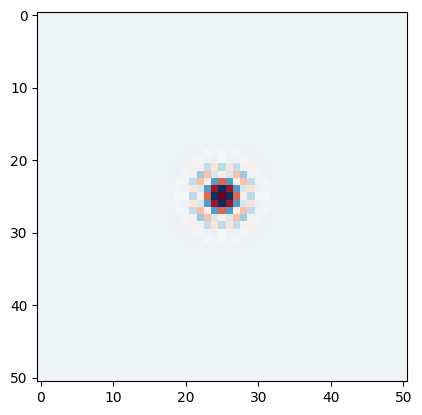

In [6]:
plt.imshow(U_,cmap='RdBu')

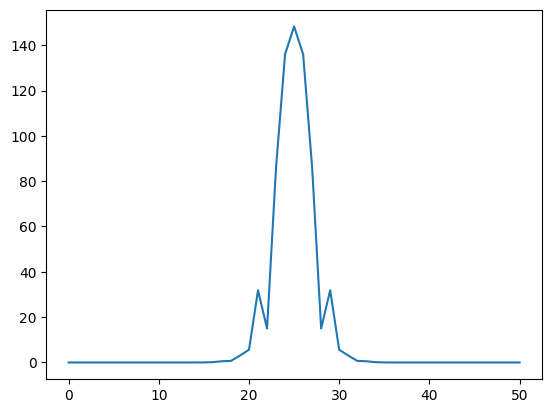

In [7]:
plt.plot(np.abs(U_[:,N//2]))